# *Clustering - Advanced*

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gym_df = pd.read_csv('./data/gym_members_exercise_tracking.csv')

# *Gym Members Clustering*
## Loading dataset
- The data-set that I am operating on you can find on Kaggle website under the following address: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset?resource=download 
- As I get to know from the description of this data-set, it is a collection of gym members' exercise tracking data. It provides a detailed overview of gym members' exercise routines, physical attributes, and fitness metrics. It contains 973 samples of gym data, including key performance indicators.
## Important information
- I have already used this data-set in my previous project, where I was trying to do Classification task. 
- For that reason, I am going to just briefly introduce the data-set and then I will focus on the clustering task.
- Recently, I did not manage to predict the workout type of the gym members very well, so I am curious if I can find some patterns in the data using clustering methods.
## Data-set

In [214]:
gym_df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [215]:
gym_df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [216]:
gym_df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [217]:
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [218]:
gym_df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [219]:
gym_df.shape

(973, 15)

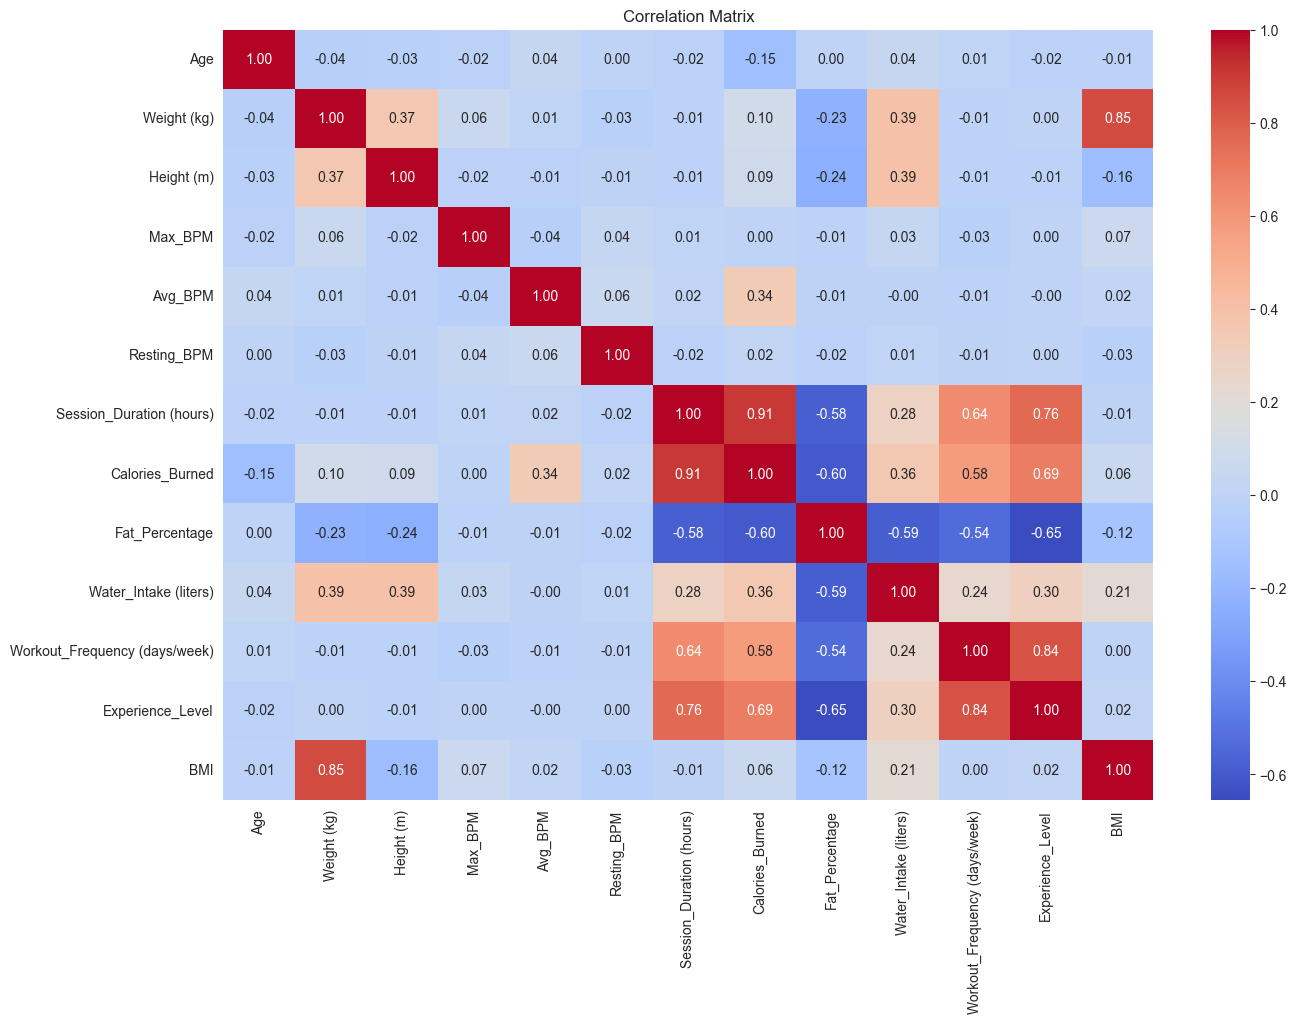

In [220]:
correlation_matrix = gym_df.select_dtypes(include="number").corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Comment
- The data-set contains 973 samples and 12 columns.
- There are no missing values in the data.
- There are some correlations between columns, but they are not very strong most of the time.
- The data-set contains columns with different scales, so I will have to scale them before applying clustering methods. 

# Preprocessing

In [221]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

gym_df_processed = gym_df.copy()

# Label encoding
label_encoder = LabelEncoder()
gym_df_processed['Gender'] = label_encoder.fit_transform(gym_df_processed['Gender'])

# One-Hot encoding
gym_df_processed = pd.get_dummies(gym_df_processed, columns=['Workout_Type'], drop_first=False)

# Defining numerical_columns
numeric_columns = gym_df_processed.select_dtypes(include=['float64', 'int64']).columns

# Scaling
scaler = StandardScaler()
gym_df_processed[numeric_columns] = scaler.fit_transform(gym_df_processed[numeric_columns])

gym_df_processed.head()



,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,1.422343,1,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,1.495690,-1.978321,1.455967,0.743295,1.609784,0.794278,False,False,False,True
1,0.600965,0,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,-0.082284,1.426301,-0.877898,0.743295,0.257176,1.064652,False,True,False,False
2,-0.548964,0,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,-0.838243,1.346380,-0.544488,0.743295,0.257176,-0.030361,True,False,False,False
3,-1.123928,1,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,-1.370351,0.611110,-0.877898,-0.352502,-1.095432,-0.976669,False,False,True,False
4,-0.056137,1,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,-1.282278,0.675047,0.289035,-0.352502,-1.095432,-1.580503,False,False,True,False


# *K-Means*
- *Objective*: Group gym members into clusters based on their physical attributes and fitness metrics.
- *Number of Clusters*: I will try to find the optimal number of clusters using the Elbow Method.

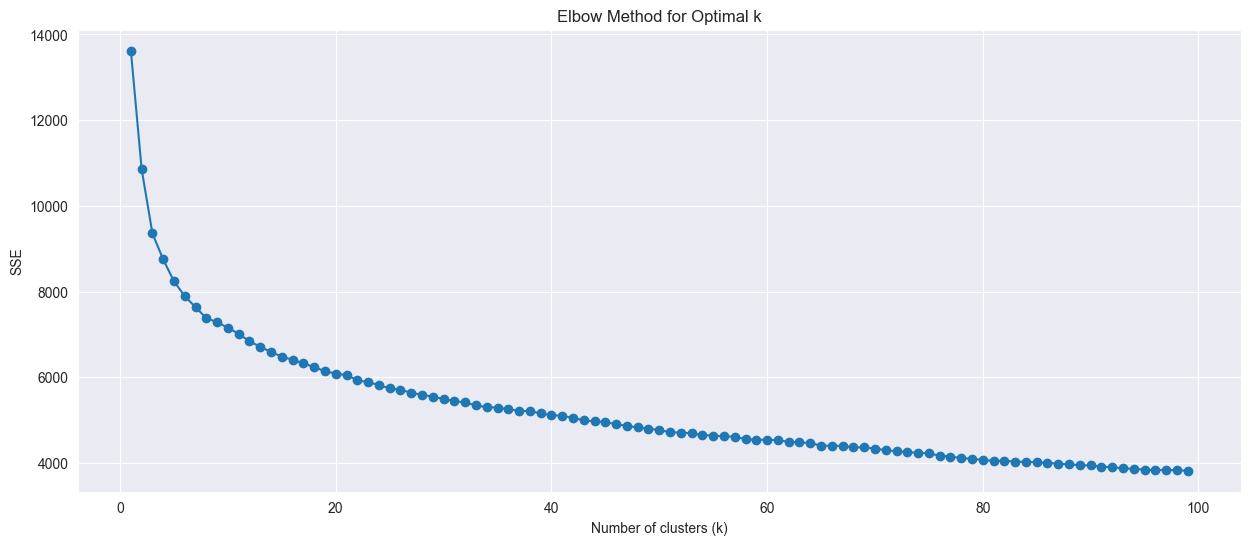

In [222]:
from sklearn.cluster import KMeans

X = gym_df_processed.values
sse = []
number_of_clusters_tested = 100

for k in range(1, number_of_clusters_tested):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.figure(figsize=(15, 6))
plt.plot(range(1, number_of_clusters_tested), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.grid(True)
plt.show()


## Comment
It seems to be hard to find the optimal number of clusters for all the various gym members. It looks like they are too different from each other. I will try to restrict the number of rows that I will use for clustering to see if it gets better.

## Comment
I tried restricting the number of rows to 100, but it did not help. I will try to compare some little number of clusters to see if I can find data useful for clustering.

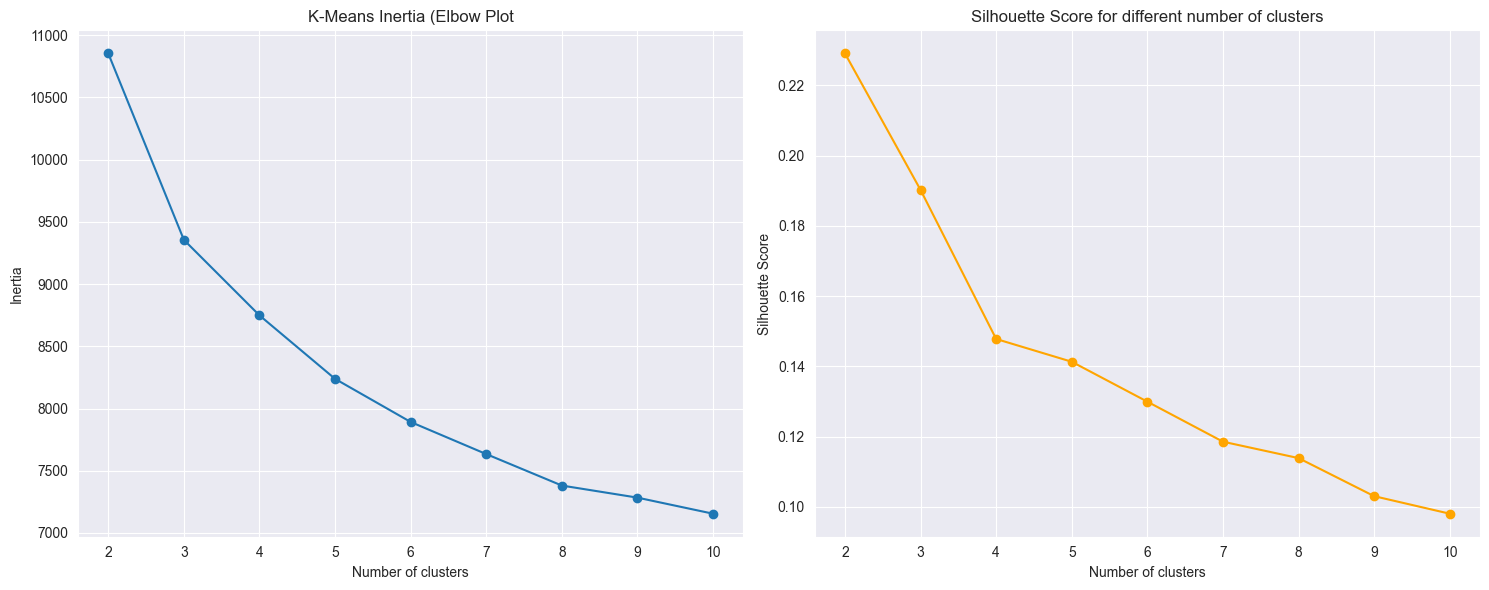

In [223]:
from sklearn.metrics import silhouette_score

clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

inertias = []
silhouette_scores = []

for clusterNumber in clusters:
    kmeans = KMeans(n_clusters=clusterNumber, random_state=0)
    kmeans.fit(X)
    
    inertias.append(kmeans.inertia_)
    
    if clusterNumber < len(gym_df_processed):
        score = silhouette_score(gym_df_processed, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(clusters, inertias, marker='o')
plt.title('K-Means Inertia (Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(clusters, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for different number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

## Conclusion
I will try to find a better dataset to present clustering. The gym members data-set is too hard to cluster. I could now find the optimal number of clusters. What is more, the silhouette score is very low for all the clusters.

# Facebook Live Sellers in Thailand
## Loading dataset
- The data-set that I am operating on you can find under: https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo/data


## Introduction to K-Means Clustering
1. Machine learning algorithms are generally divided into two primary categories: supervised learning and unsupervised learning. Additionally, there are other categories such as semi-supervised learning and reinforcement learning, but the majority of algorithms fall under the supervised or unsupervised umbrella. The key distinction between these categories lies in the presence or absence of a target variable.

2. In supervised learning, a target variable is present, allowing the model to learn a mapping from inputs to the desired output. Conversely, in unsupervised learning, there is no target variable. Instead, the dataset consists solely of input variables, which describe the data without predefined labels or outcomes. This makes unsupervised learning well-suited for uncovering hidden patterns or structures in the data.

3. A prominent example of an unsupervised learning algorithm is K-Means clustering. It is widely used when working with unlabeled data—that is, data without predefined categories or groups. The K-Means algorithm operates by partitioning the dataset into a predefined number of clusters (denoted as 𝐾) based on feature similarity. The process is iterative: the algorithm assigns each data point to one of the K clusters, aiming to minimize within-cluster variance. This approach ensures that data points within the same cluster are as similar as possible while being distinct from those in other clusters.

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Load the dataset
df = pd.read_csv('./data/Live.csv')

In [225]:
df.shape

(7050, 16)

## Comment
- The data-set contains 7050 samples and 16 columns.
- Let's take a deeper look at the data.

In [226]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [228]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

## Comment
- There are some missing values in the data. The last 4 columns are completely useless. I will remove them.

In [229]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


## Comment
- Now, there are no missing values in the data-set.
- However, we can see first 3 columns having type object, which is a categorical type. I will explore them.

In [231]:
len(df['status_id'].unique())

6997

## Comment
There are 6997 unique values in the 'status_id' column. It is too much to encode them using One-Hot Encoding. I will drop this column.It is approximately a unique identifier for each row. Thus, this is not a variable that we can use. Hence, I will drop it.

In [232]:
df.drop(['status_id'], axis=1, inplace=True)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       7050 non-null   object
 1   status_published  7050 non-null   object
 2   num_reactions     7050 non-null   int64 
 3   num_comments      7050 non-null   int64 
 4   num_shares        7050 non-null   int64 
 5   num_likes         7050 non-null   int64 
 6   num_loves         7050 non-null   int64 
 7   num_wows          7050 non-null   int64 
 8   num_hahas         7050 non-null   int64 
 9   num_sads          7050 non-null   int64 
 10  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 606.0+ KB


## Comment
Now, let's explore the second categorical column - status_published.

In [234]:
len(df['status_published'].unique())

6913

## Comment
The same situation here. There are 6913 unique values in the 'status_published' column. I will drop this column as well.

In [235]:
df.drop(['status_published'], axis=1, inplace=True)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


## Comment
Now, we have only one left - 'status_type'.

In [237]:
len(df['status_type'].unique())

4

In [238]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

## Comment
Now better, that one is not going to be dropped from the data-set. Status_type has only 4 unique values. Therefore, I will try to use it. Let's take a look at our data-set again after the drop actions:

In [239]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


## Comment
We can see that now it looks more promising. I will convert status_type unique values into integers to make it easier to operate with. I will use LabelEncoder() to achieve this.

In [240]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X = df
y = df['status_type']

X['status_type'] = label_encoder.fit_transform(X['status_type'])
y = label_encoder.transform(y)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int32
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 523.4 KB


In [241]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


## Feature Scaling
In order to make algorithm efficient, we need to scale the data

In [242]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

cols = X.columns
X = ms.fit_transform(X)

X = pd.DataFrame(X, columns=[cols])

X.head()


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


## MinMax Scaler:
it is a data preprocessing technique used in machine learning to scale numerical data to a specific range, typically [0, 1]. It works by transforming each feature value based on the following formula:
- X_scaled = (X - X_min) / (X_max - X_min). 
- This method ensures that all features are rescaled proportionally, preserving their relationships but fitting them within the desired range. It's commonly used when features have different units or scales, as it helps improve the performance and stability of machine learning models.

## K-Means with 2 clusters
In the first place, I want to test clustering on just 2 clusters

In [243]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)


KMeans(n_clusters=2, random_state=0)

In [244]:
kmeans.cluster_centers_

array([[9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03],
       [3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03]])

## Comment
The K-Means algorithm clusters data by partitioning it into n groups, aiming to minimize a metric called inertia (also known as the within-cluster sum of squares). Inertia measures the internal cohesion of clusters, quantifying how closely related the data points within each cluster are.

The algorithm works by dividing a dataset of N samples (X) into K disjoint clusters (C), where each cluster is represented by the mean of its samples, commonly referred to as the cluster centroid. The goal of the K-Means algorithm is to select centroids in such a way that the inertia is minimized, ensuring that the clusters are as compact and well-separated as possible. 

In [245]:
kmeans.inertia_

237.75726404419547

## Inertia
- the lesser, the better
- we have a pretty high inertia, so it is not a perfect model

## Quality checking of weak classification by the model

In [246]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print(f"{correct_labels} out of {y.size} were correctly labeled.")


4288 out of 7050 were correctly labeled.


In [247]:
print("Accuracy score: {0:0.2f}". format(correct_labels/float(y.size)))

Accuracy score: 0.61


## Comment
We achieved accuracy of 1% which is not acceptable

## Elbow method
I will use elbow method to look for the optimal number of clusters

## How do I count the accuracy?
As we know, unsupervised learning does not support "accuracy" as a metric. However, we can compare the labels assigned by the model to the true labels. The model assigns labels to clusters, and we can compare these labels to the true labels. If the labels are the same, we can say that the model has correctly classified the data. True labels are defined as y in the code above.


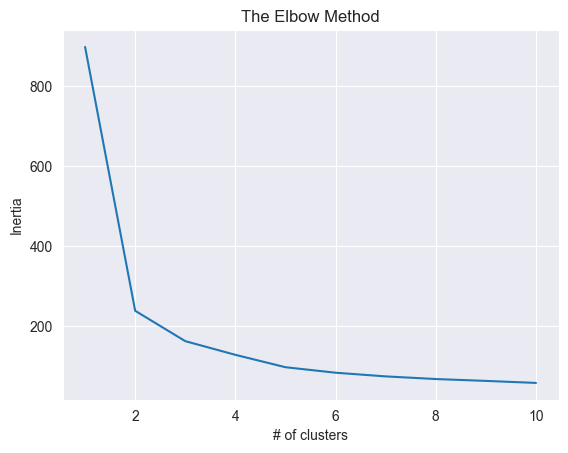

In [248]:
from sklearn.cluster import KMeans

inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertias)
plt.title('The Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

## Comment
- From the plot above we can see that 'elbow point' is at 2 clusters. But we have already seen how little efficiency this model has. Maybe we should not always trust the elbow method, but use it as a guide. 
- I will check the model accuracy with different number of clusters. 

## K-Means with 3 clusters

In [249]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

labels=kmeans.labels_

correct_labels = sum(y == labels)
print(f"{correct_labels} out of {y.size} were correctly labeled.")
print("Accuracy score: {0:0.2f}". format(correct_labels/float(y.size)))


4066 out of 7050 were correctly labeled.
Accuracy score: 0.58


## K-Means with 4 clusters

In [250]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

labels=kmeans.labels_

correct_labels = sum(y == labels)
print(f"{correct_labels} out of {y.size} were correctly labeled.")
print("Accuracy score: {0:0.2f}". format(correct_labels/float(y.size)))


4112 out of 7050 were correctly labeled.
Accuracy score: 0.58


## K-Means with 5 clusters

In [251]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

labels=kmeans.labels_

correct_labels = sum(y == labels)
print(f"{correct_labels} out of {y.size} were correctly labeled.")
print("Accuracy score: {0:0.2f}". format(correct_labels/float(y.size)))


4080 out of 7050 were correctly labeled.
Accuracy score: 0.58


## Comment
We have achieved accuracy of 58% which is a relatively high accuracy. We have achieved it with k=4 and k=5. Which one is better? I will use Silhoette_score to decide.

In [252]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
labels=kmeans.labels_
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score for 4 clusters: {sil_score}")

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
labels=kmeans.labels_
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score for 5 clusters: {sil_score}")

Silhouette Score for 4 clusters: 0.7385843810496917
Silhouette Score for 5 clusters: 0.7669770951371734


## Silhouette Score:
it is a metric used to evaluate the quality of clusters in clustering algorithms like K-Means. It measures how similar a data point is to points in its own cluster compared to points in other clusters. The score ranges from -1 to 1:
- 1: Points are well-matched to their cluster and far from other clusters.
- 0: Points are on or near the boundary between clusters.
- -1: Points are assigned to the wrong cluster.
## Comment
So with Silhouette Score I choose 5 clusters as the best one. 

# Results and conclusion
1. At first, I tried operating on gym_members_exercise_tracking.csv, but it was not promising at all. I could not even decide what number of clusters is optimal, so I gave up
2. Live.csv allowed us to see some more satisfying results.
3. Elbow method would suggest using k=2 because there occurs that breaking point. However, the most optimal one was found at k=5 with accuracy of 58%.
4. As I said, we reached 58% accuracy, which is a relatively high accuracy. Maybe not very precise, but still good.
5. The deciding factor was Silhouette Score, which was higher for k=5 than for k=4.